In [2]:
# reinforcement learning (we will be using Q learning)- not feeding data but give examples and we let our model come up with its own examples by exploring an environment (good for games etc)

# Environment- In reinforcement learning tasks we have a notion of the enviornment. This is what our agent will explore. An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

# Agent- an agent is an entity that is exploring the enviornment. Our agent will interact and take different actions within the enviornment. In our mario example the mario character within the game would be our agent.

# State- always our agent will be in what we call a state. The state simply tells us about the status of the agent. The most common example of a state is the location of the agent within the enviornment. Moving locations would change the agents state.

# Action- any interaction between the agent and enviornment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current state of the agent. In fact, the act of doing nothing is an action as well! The action of say not pressing a key if we are using our mario example.

# Reward- every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an enviornment. Sometimes the reward will be clear, for example if an agent performs an action which increases their score in the enviornment we could say they've recieved a positive reward. If the agent were to perform an action which results in them losing score or possibly dying in the enviornment then they would recieve a negative reward.

In [3]:
# Q learning example
import gym # open AI gym!

In [4]:
env = gym.make('FrozenLake-v0') # frozenlake environment

In [5]:
# number of states
print(env.observation_space.n)
# number of actions
print(env.action_space.n)

16
4


In [6]:
# reset environment to default state
env.reset()

0

In [7]:
# random action 
action = env.action_space.sample()

In [8]:
# take action and returns information about the action 
observation, reward, done, info = env.step(action)

In [9]:
# render GUI for environment- goal here to get to 'G'
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [10]:
# frozenlake environment
# building the Q Table
import gym 
import numpy as np
import time 

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [11]:
# matrix with all 0 values
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
# constants
# how many times to run the env from the beginning 
EPISODES = 10000
# max number of steps allowed for each run of environment 
MAX_STEPS = 100

LEARNING_RATE = 0.81 # higher this is the faster it learns
GAMMA = 0.96

In [13]:
# picking an action 
# start with a 90% chance of picking a random action 
epsilon = 0.9

# code to pick action 
# check if randomly selected value is < epsilon
if np.random.uniform(0, 1) < epsilon:
# take random action 
   action = env.action_space.sample()

# use Q table to pick best action based on current values
else: action = np.argmax(Q[state, :])

In [14]:
# important equation: Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

In [15]:
# putting it all together
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [16]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[2.05324783e-01 6.77189354e-02 5.51612376e-02 4.57703928e-02]
 [3.52801812e-02 2.97843164e-02 3.00053972e-04 1.41430188e-01]
 [1.37816252e-02 1.49149308e-01 2.11145316e-02 2.13196104e-02]
 [7.24880875e-03 8.14418546e-06 4.54222208e-03 1.22541503e-01]
 [4.79302549e-01 1.52348152e-02 4.62635024e-02 4.38792726e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.57939715e-03 1.07912083e-06 3.86611003e-05 1.50470653e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.70552503e-03 5.73364020e-02 1.81087688e-02 3.94105542e-01]
 [2.35801811e-03 7.14891938e-01 1.06675335e-02 7.34315552e-04]
 [1.88574120e-01 1.06190336e-03 8.06397151e-03 9.52529973e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06217138e-01 9.38491499e-02 8.20859604e-01 2.12543852e-02]
 [1.38288727e-01 9.80438985e-01 1.86673561e-01 2.22554749e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

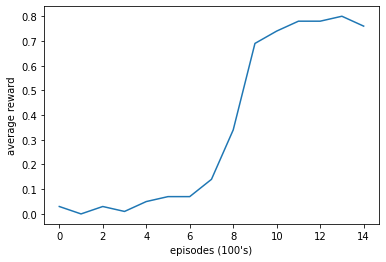

In [17]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()